In [1]:
from haar import haar
from pi2 import pi2 
from pi1 import pi1

import numpy as np 

from scipy import integrate
import scipy
from scipy.linalg import lstsq, solve

import matplotlib as mpl
import matplotlib.pyplot as plt 


mpl.style.use('seaborn')

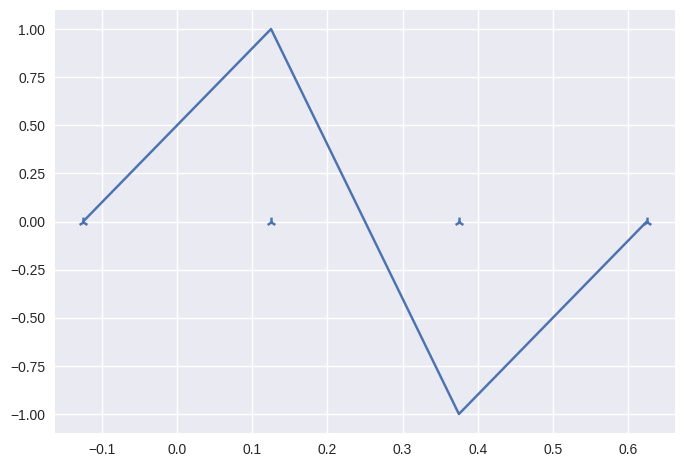

In [10]:
J = 1 
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

y = haar(x, 3, J)

plt.plot(x, y)
plt.scatter(x, np.zeros(x.shape), marker="2")

In [ ]:
def wavelet_solve_ex6(J): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1.e-6
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in range(N): 
            W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [2]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

yexact = lambda x : (x**3 - 4/3*x**2 + x/3) * np.sin(2*np.pi*x)
# y'(1) = 0

def _integrator(): 

SyntaxError: incomplete input (3198633138.py, line 1)